In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import numpy as np

url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-dhaka-weather1953-2016.csv'
df = pd.read_csv(url)
df.head()




,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
0,1953,1,26.7,10.9,70,10.0
1,1953,2,33.6,14.7,65,2.0
2,1953,3,37.5,21.7,73,90.0
3,1953,4,37.7,23.4,69,90.0
4,1953,5,34.7,24.2,81,274.0


#### Data set size

In [2]:
df.shape

(768, 6)

#### Checking Null value

In [3]:
df.isnull().sum()

YEAR                0
Month               0
MaxTemp             0
MinTemp             0
RelativeHumidity    0
Rainfall            0
dtype: int64

#### Descriptive analysis

In [5]:
df.describe()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
count,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,1984.500000,6.500000,33.438529,21.51875,75.207031,168.377214
std,18.484992,3.454302,2.964510,4.97461,8.593081,173.784463
min,1953.000000,1.000000,24.300000,9.50000,49.000000,0.000000
25%,1968.750000,3.750000,31.875000,17.15000,69.000000,13.000000
50%,1984.500000,6.500000,33.900000,23.70000,76.000000,121.000000
75%,2000.250000,9.250000,35.525000,25.80000,83.000000,273.250000
max,2016.000000,12.000000,40.800000,28.10000,90.000000,856.000000


#### Finding Correlation

In [6]:
df.corr()

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
YEAR,1.000000,0.000000,0.044080,0.098500,-0.165042,-0.009006
Month,0.000000,1.000000,-0.134986,0.210387,0.481070,0.125966
MaxTemp,0.044080,-0.134986,1.000000,0.724186,0.097398,0.365135
MinTemp,0.098500,0.210387,0.724186,1.000000,0.624770,0.687317
RelativeHumidity,-0.165042,0.481070,0.097398,0.624770,1.000000,0.708577
Rainfall,-0.009006,0.125966,0.365135,0.687317,0.708577,1.000000


#### Heatmap

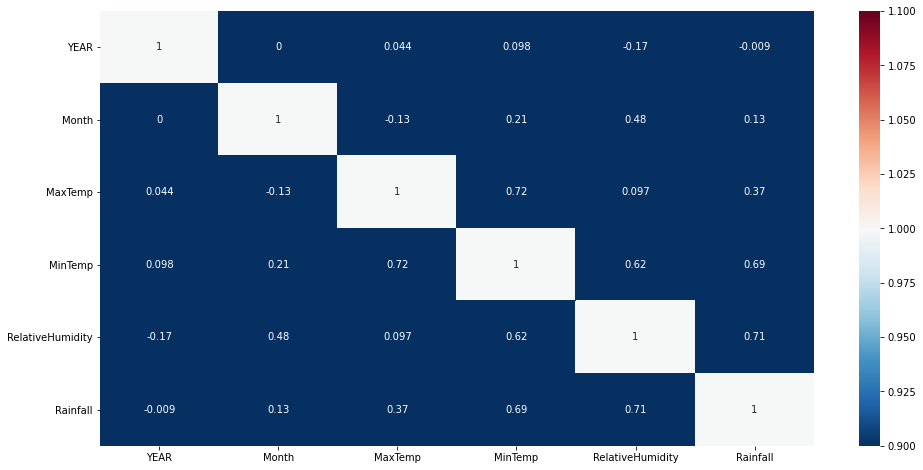

In [7]:
correlation = df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlation, annot=True, linewidths=0,vmin=1,cmap='RdBu_r')
plt.show()

#### Average Monthly Rainfall

In [8]:
Avgrain=df.groupby('Month')['Rainfall'].mean()
Avgrain

Month
1       6.781250
2      19.703125
3      54.307812
4     126.431250
5     271.131250
6     360.075000
7     382.076563
8     313.971875
9     284.639063
10    164.120312
11     28.017187
12      9.271875
Name: Rainfall, dtype: float64

#### Distribution Plot

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

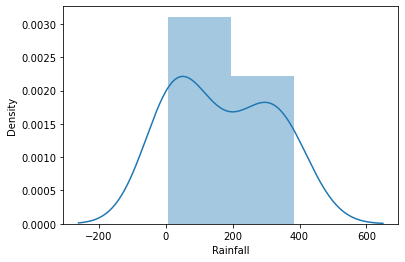

In [10]:
sns.distplot(Avgrain)

#### Max to Min rainfall order accroding to month

In [11]:
df.groupby('Month')['Rainfall'].mean().sort_values(ascending=False)

Month
7     382.076563
6     360.075000
8     313.971875
9     284.639063
5     271.131250
10    164.120312
4     126.431250
3      54.307812
11     28.017187
2      19.703125
12      9.271875
1       6.781250
Name: Rainfall, dtype: float64

#### Boxplot for Dataset (outlayer Showing such as:1,2,500,2,4,340 here 500 and 340 is outlayer)

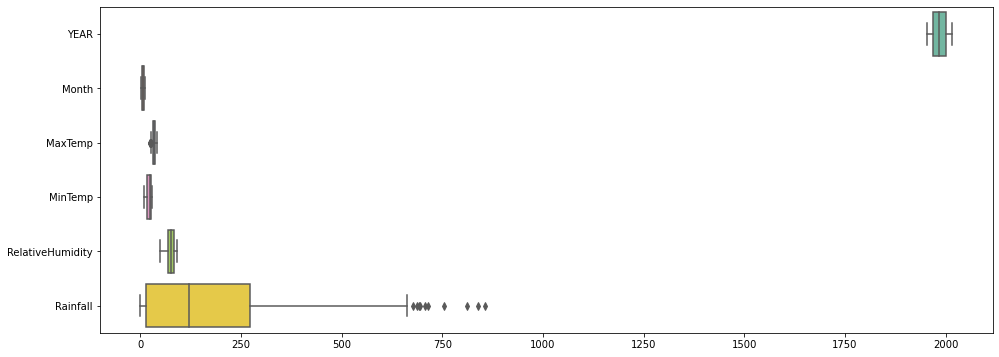

In [12]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=df, orient="h", palette="Set2") ##h=horizontal oriention

In [13]:
'''
h= for horizontal oriention view
'''


'\nh= for horizontal oriention view\n'

#### Individual Boxplot for outlayer Detection

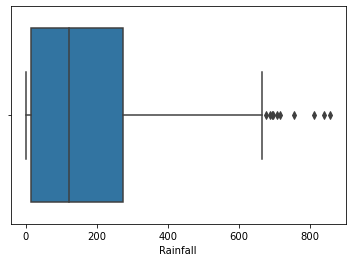

In [14]:
ax = sns.boxplot(x=df["Rainfall"])

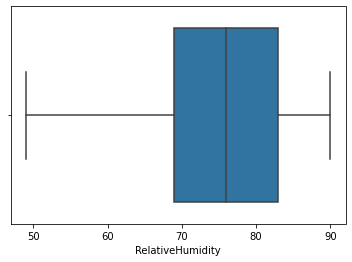

In [16]:
ax=sns.boxplot(x=df["RelativeHumidity"])

#### boxplot for double variable

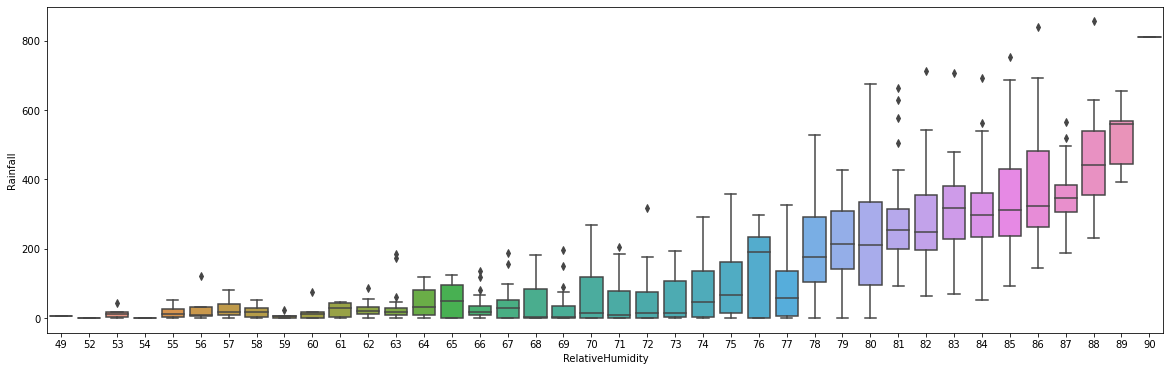

In [19]:
plt.figure(figsize=(20,6))
ax = sns.boxplot(x="RelativeHumidity", y="Rainfall", data=df)

#### Categeory Boxplot

<Figure size 1152x432 with 0 Axes>

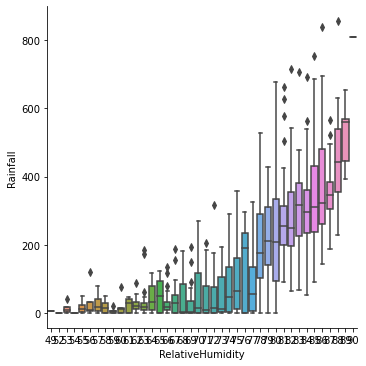

In [24]:
plt.figure(figsize=(16,6))
ax = sns.catplot(x="RelativeHumidity", y="Rainfall", kind="box", data=df)

#### Histogram

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'MinTemp'}>],
       [<AxesSubplot:title={'center':'RelativeHumidity'}>,
        <AxesSubplot:title={'center':'Rainfall'}>]], dtype=object)

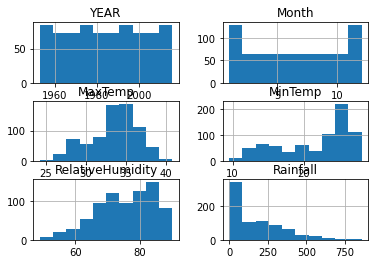

In [25]:
df.hist()

#### Pair Plot

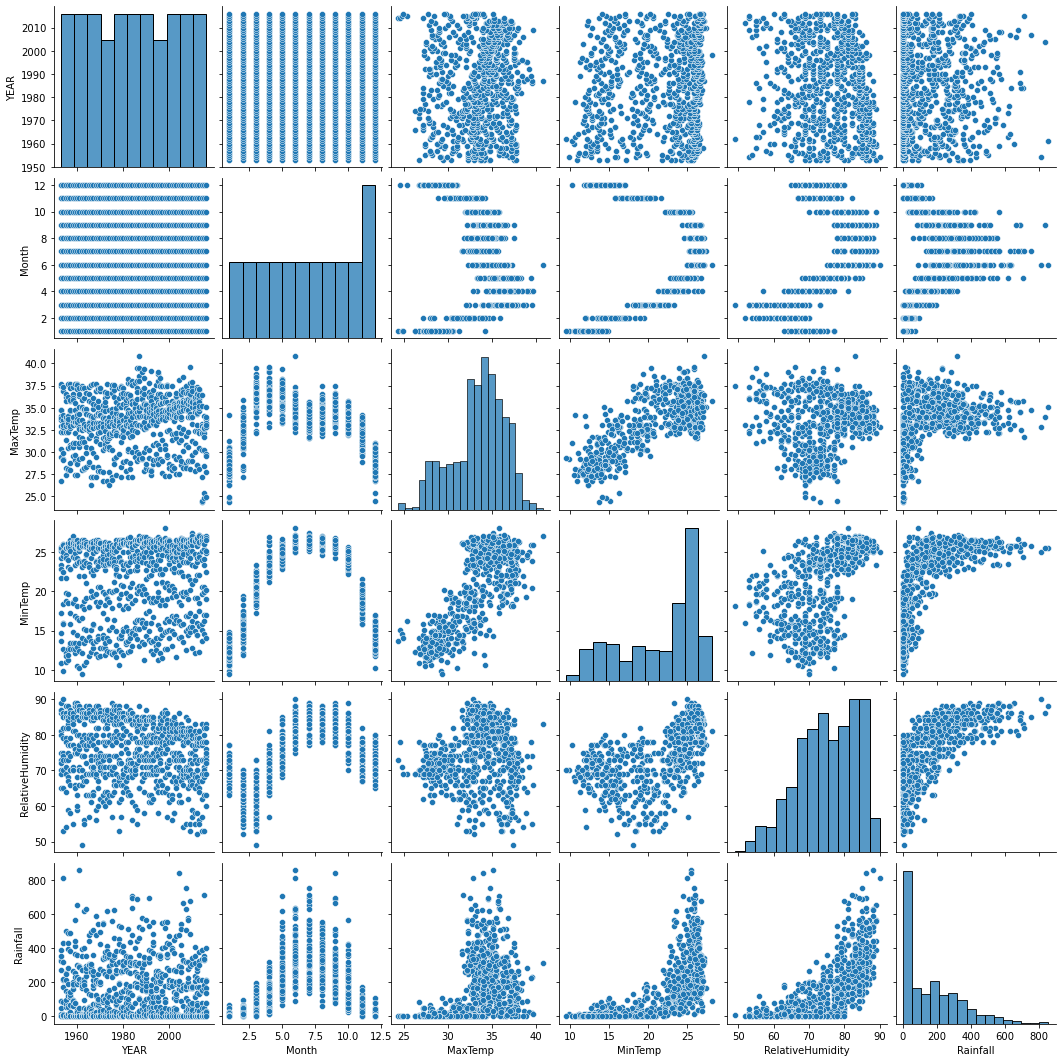

In [26]:
sns.pairplot(df)

#### Scatter plot

Text(0, 0.5, 'RelativeHumidity')

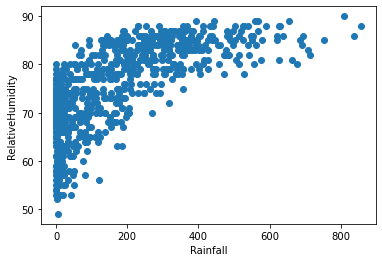

In [31]:
plt.scatter(x=df.Rainfall, y=df.RelativeHumidity)
plt.xlabel('Rainfall')
plt.ylabel('RelativeHumidity')

#### Joint Plot

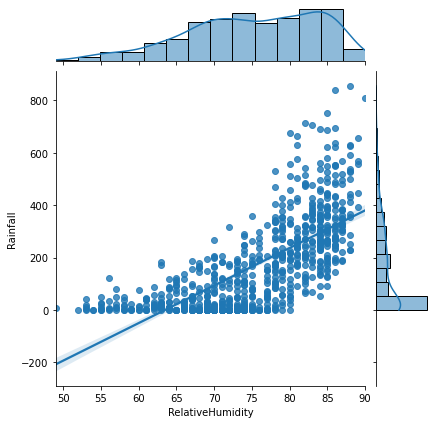

In [32]:
ax = sns.jointplot(x="RelativeHumidity", y="Rainfall", kind="reg", data=df)

#### Time Series Plot

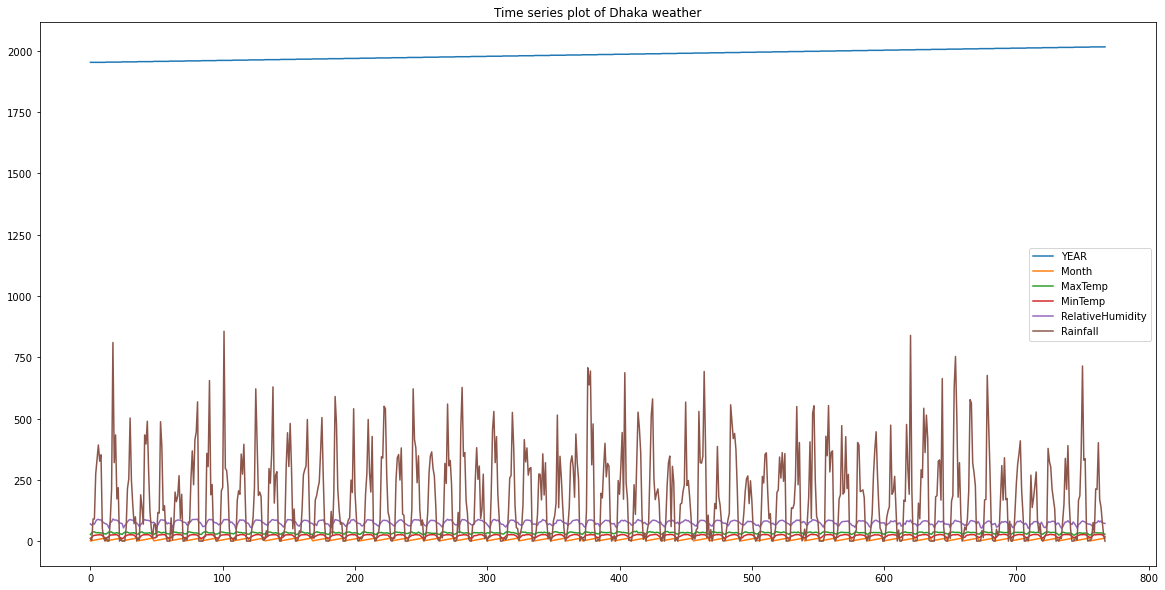

In [33]:
df.plot(figsize=(20,10))
plt.title("Time series plot of Dhaka weather")
plt.show()

#### Time series of year and Min Temp

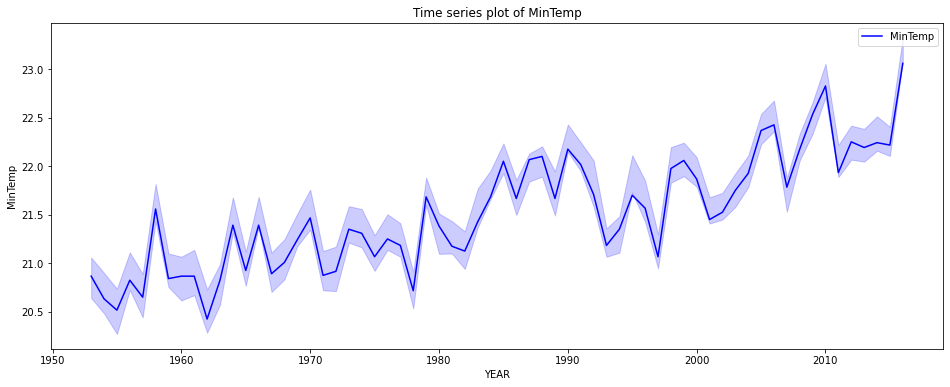

In [34]:
plt.figure(figsize=(16, 6))
plt.title('Time series plot of MinTemp')
ax = sns.lineplot(x="YEAR", y="MinTemp",ci=10,color="blue", label="MinTemp",data=df) ##Ci= the gap between the lines of year,min temp, max temp....and so on from the above graph

#### Time Series of Average Humidity

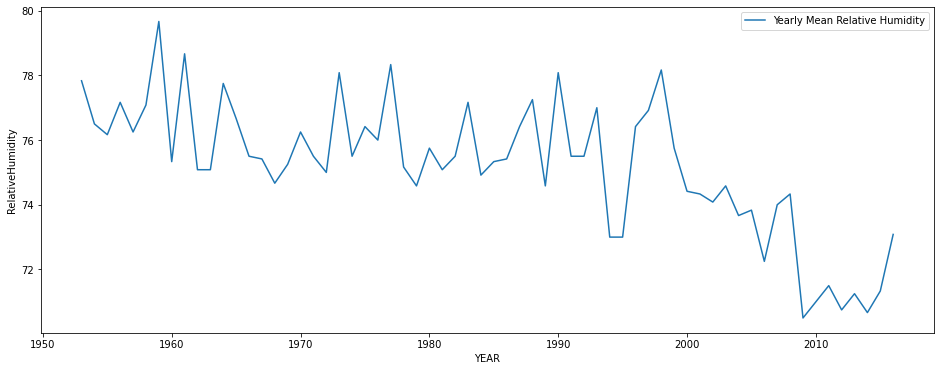

In [35]:
rh=df.groupby('YEAR')['RelativeHumidity'].mean()
plt.figure(figsize=(16, 6))
ax = sns.lineplot( label="Yearly Mean Relative Humidity",data=rh)